In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn import linear_model
from scipy.stats import chi2
import random
import pprint

In [ ]:
df = pd.read_csv('star_classification.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

obj_ID
mean:  1.2376647218149033e+18
median:  1.2376634631442929e+18
SD:  8438517701657.614
max_value:  1.2376805313563863e+18
min_value:  1.23764594290439e+18


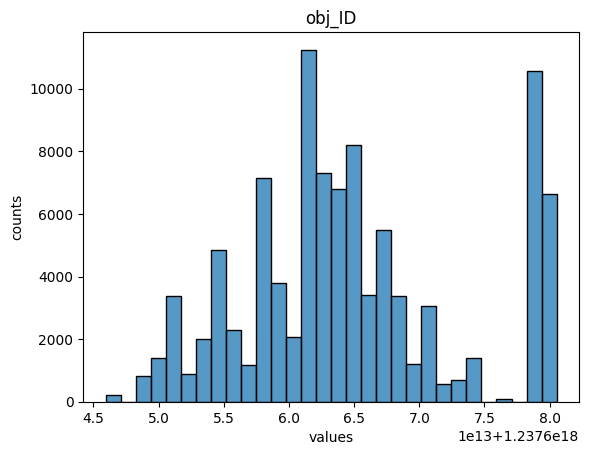

alpha
mean:  177.6291166216363
median:  180.9007001209685
SD:  96.50175838592124
max_value:  359.999809770956
min_value:  0.0055278279239701


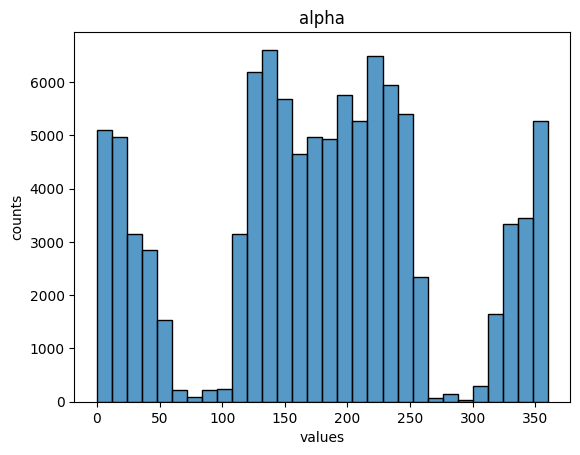

delta
mean:  24.135304595352267
median:  23.64592229835845
SD:  19.644567180721133
max_value:  83.00051858898
min_value:  -18.7853280771825


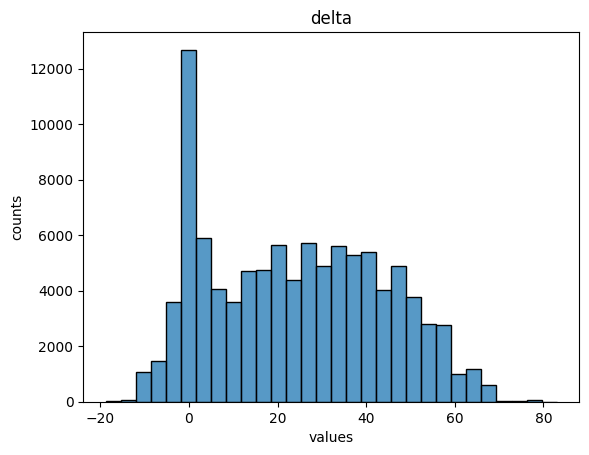

u
mean:  21.980468269
median:  22.179135000000002
SD:  31.769131956899212
max_value:  32.78139
min_value:  -9999.0


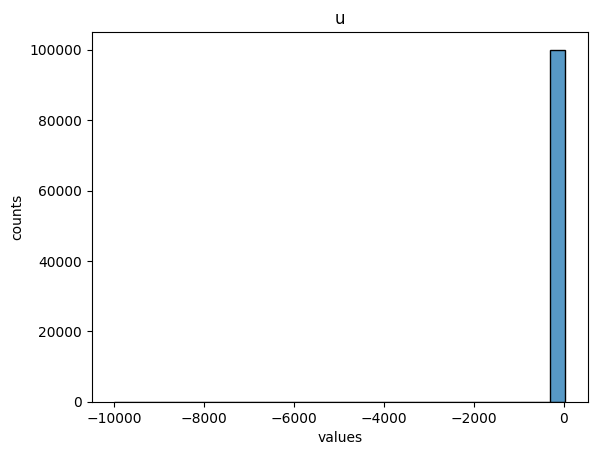

g
mean:  20.5313869616
median:  21.099835
SD:  31.75013357722468
max_value:  31.60224
min_value:  -9999.0


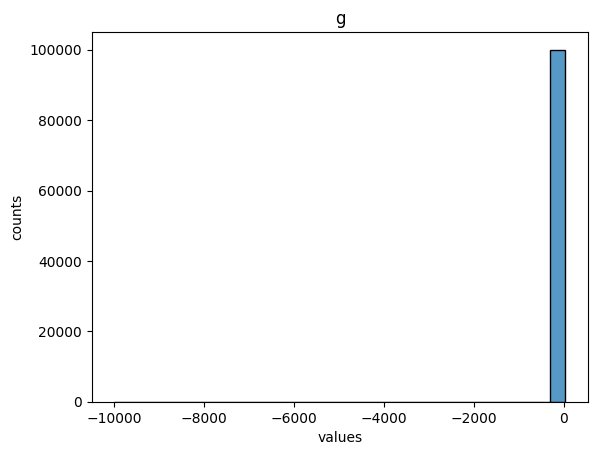

r
mean:  19.645762146
median:  20.12529
SD:  1.854750420523872
max_value:  29.57186
min_value:  9.82207


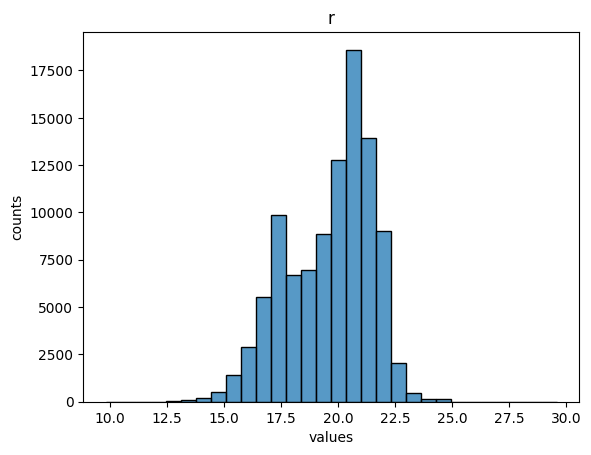

i
mean:  19.084854232030004
median:  19.405144999999997
SD:  1.757886000994467
max_value:  32.14147
min_value:  9.469903


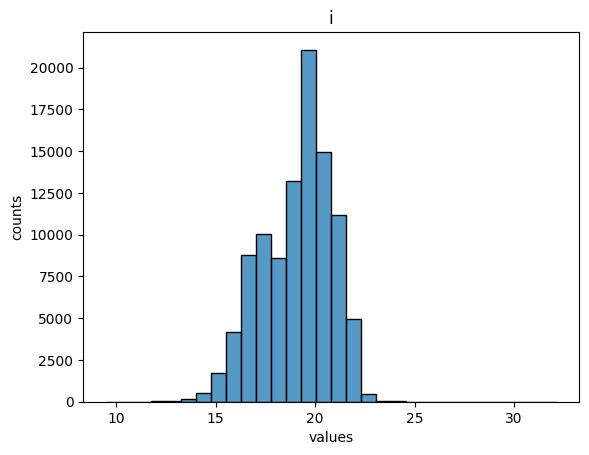

z
mean:  18.66881032223
median:  19.004595000000002
SD:  31.727993144798113
max_value:  29.38374
min_value:  -9999.0


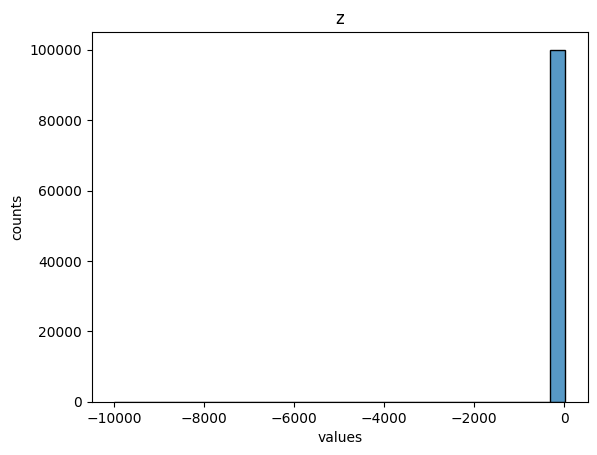

run_ID
mean:  4481.36606
median:  4188.0
SD:  1964.7547688197824
max_value:  8162
min_value:  109


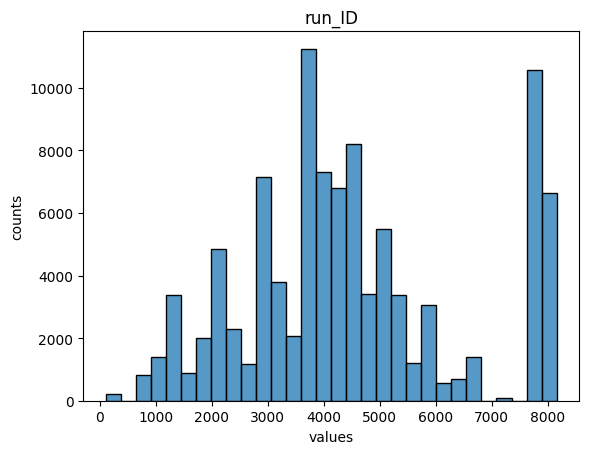

rerun_ID
mean:  301.0
median:  301.0
SD:  0.0
max_value:  301
min_value:  301


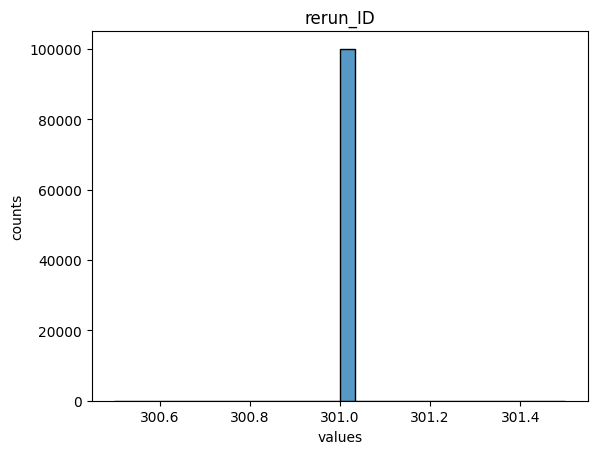

cam_col
mean:  3.51161
median:  4.0
SD:  1.5869042844166752
max_value:  6
min_value:  1


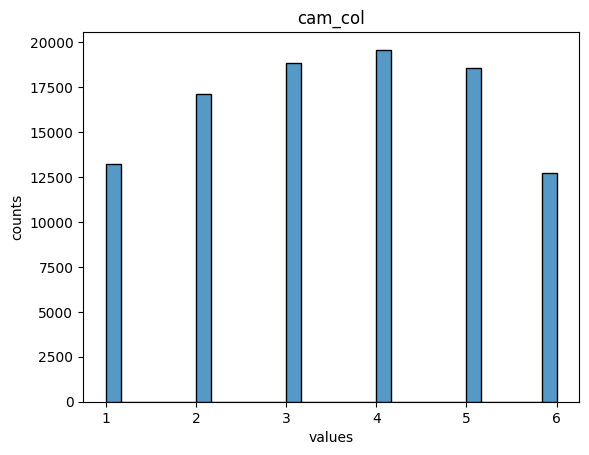

field_ID
mean:  186.13052
median:  146.0
SD:  149.01032757674753
max_value:  989
min_value:  11


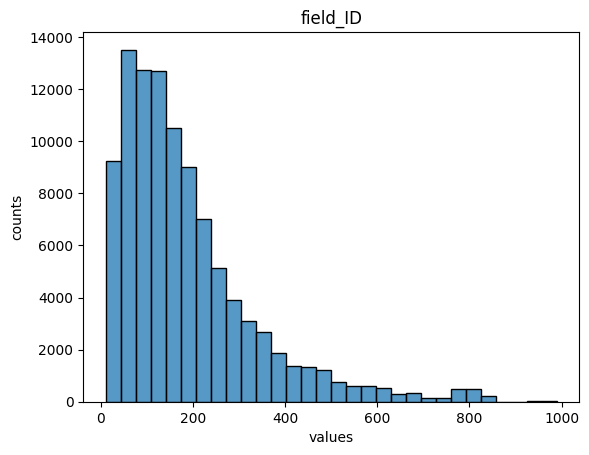

spec_obj_ID
mean:  5.783882297552056e+18
median:  5.614883135353543e+18
SD:  3.32399954946146e+18
max_value:  1.4126940609093851e+19
min_value:  2.9951908938097664e+17


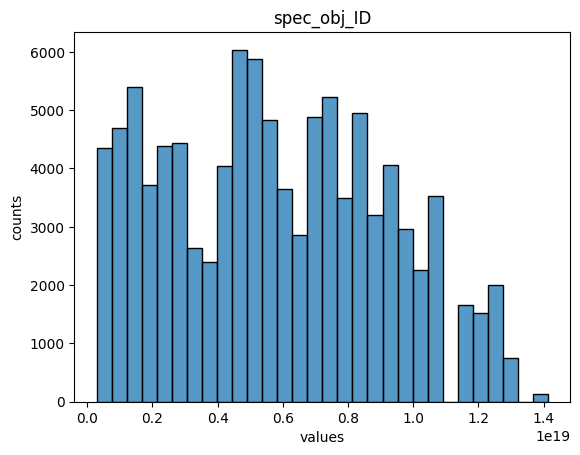

class


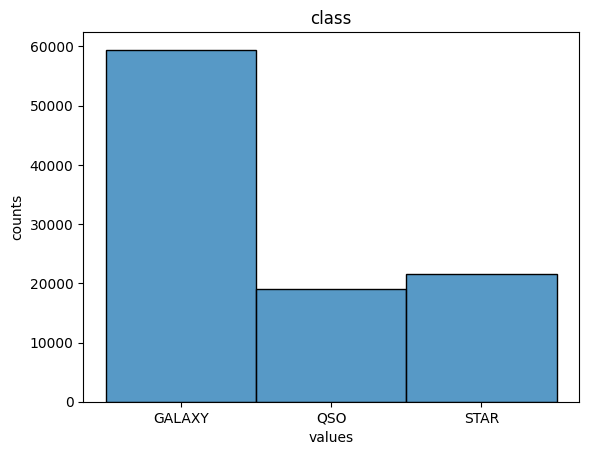

redshift
mean:  0.5766608040203002
median:  0.42417325
SD:  0.7307036226432938
max_value:  7.011245
min_value:  -0.009970667


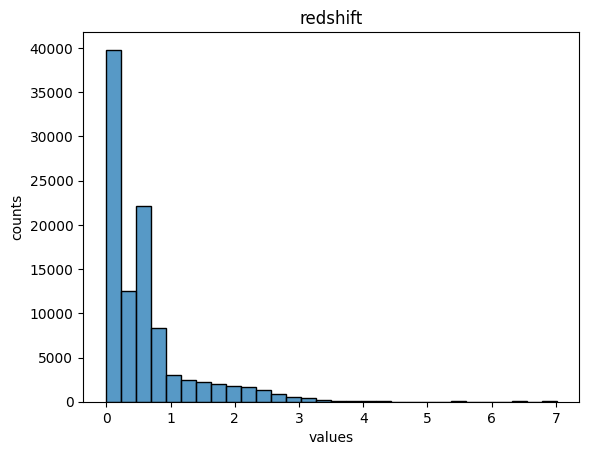

plate
mean:  5137.00966
median:  4987.0
SD:  2952.2885897768674
max_value:  12547
min_value:  266


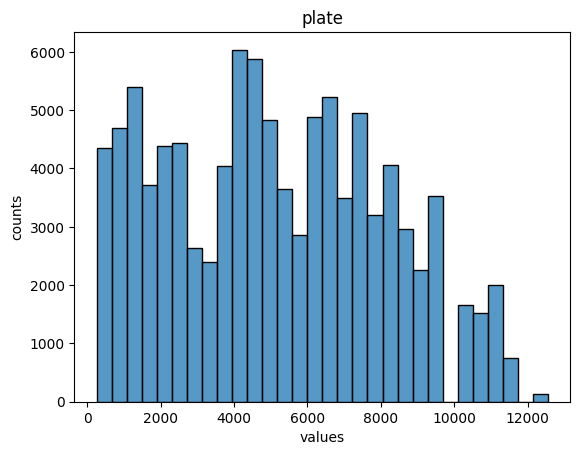

MJD
mean:  55588.6475
median:  55868.5
SD:  1808.4751904086907
max_value:  58932
min_value:  51608


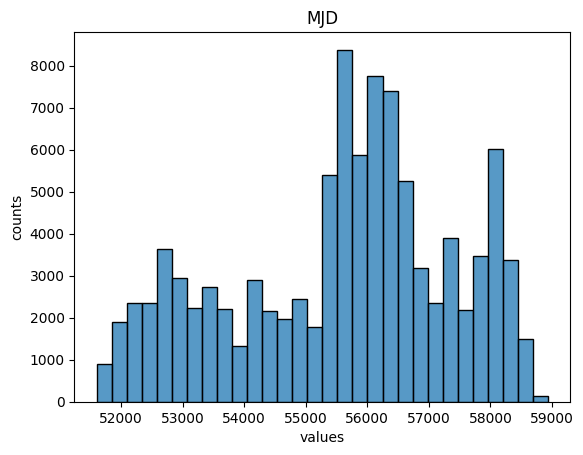

fiber_ID
mean:  449.31274
median:  433.0
SD:  272.4970416237439
max_value:  1000
min_value:  1


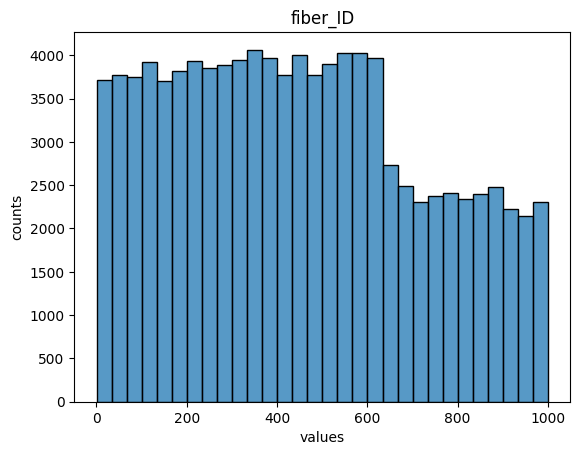

In [6]:
def summary_max_min(l):
    print('mean: ', np.average(l))
    print('median: ', np.median(l))
    print('SD: ', np.std(l))
    print('max_value: ',np.max(l))
    print('min_value: ',np.min(l))
    return np.average(l),np.median(l),np.std(l),np.max(l),np.min(l)

def make_shape_graph(l,name):
    ax1 = sns.histplot(l, bins = 30)
    ax1.set_title(name)
    ax1.set_xlabel('values')
    ax1.set_ylabel('counts')
    plt.show()

for i in df:
    print(i)
    if not i == 'class':
        summary_max_min(df[i])
    make_shape_graph(df[i],i)

In [7]:
def find_error(array):
    error_row = []
    for i in range(len(array)):
        if array[i] < 0:
            error_row.append(i)
    return error_row

error_list = ['u','g','z']
for i in error_list:
    print(find_error(df[i]))

[79543]
[79543]
[79543]


In [8]:
df.drop(labels= 79543, axis = 0,inplace= True)
df.reset_index(drop = True, inplace =  True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  class        99999 non-null  object 
 14  redshift     99999 non-null  float64
 15  plate        99999 non-null  int64  
 16  MJD          99999 non-null  int64  
 17  fiber_ID     99999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

u
mean:  22.080679075790755
median:  22.17914
SD:  2.251057175594488
max_value:  32.78139
min_value:  10.99623


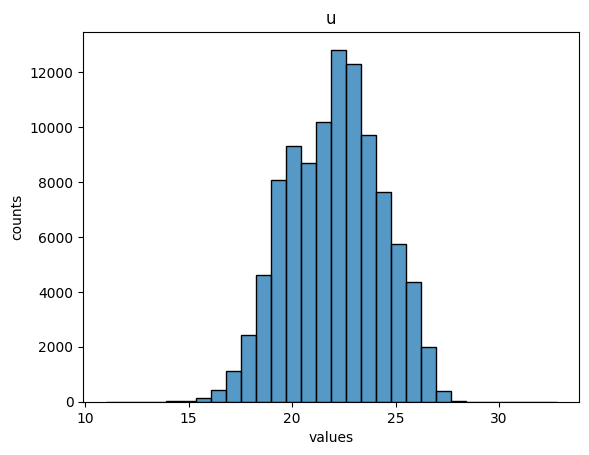

g
mean:  20.631583277432775
median:  21.09993
SD:  2.0373738822644065
max_value:  31.60224
min_value:  10.4982


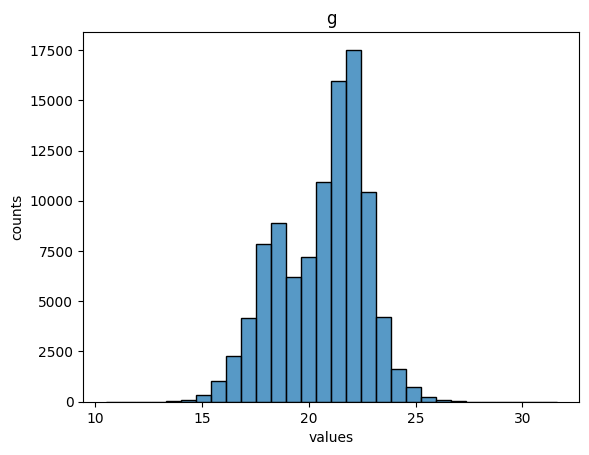

z
mean:  18.768988012110125
median:  19.0046
SD:  1.7659730407743037
max_value:  29.38374
min_value:  9.612333


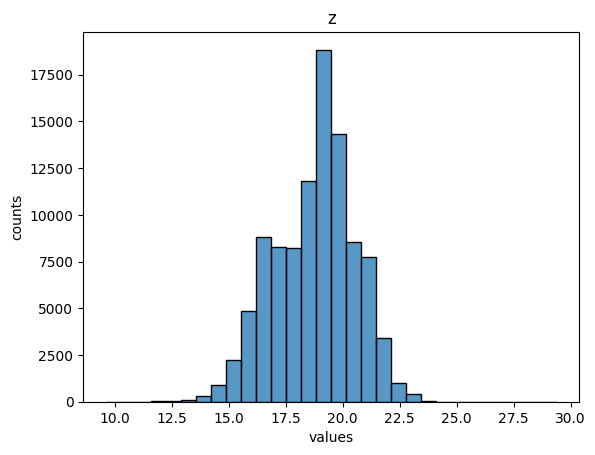

In [9]:
for i in error_list:
    print(i)
    summary_max_min(df[i])
    make_shape_graph(df[i],i)

In [10]:
test_list = ['class','alpha','delta','u','g','r','i','z','redshift']
test_df = pd.DataFrame()
for i in test_list:
    test_df[i] = df[i]
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   class     99999 non-null  object 
 1   alpha     99999 non-null  float64
 2   delta     99999 non-null  float64
 3   u         99999 non-null  float64
 4   g         99999 non-null  float64
 5   r         99999 non-null  float64
 6   i         99999 non-null  float64
 7   z         99999 non-null  float64
 8   redshift  99999 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB
None


In [11]:
target = test_df['class']
test_df.drop(['class'],axis = 1, inplace = True)
data = test_df

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.25, random_state=5)

In [13]:
#decision tree model
dt_model = tree.DecisionTreeClassifier(max_depth=2)
dt_model = dt_model.fit(X_train, Y_train)
print(classification_report(Y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.94      0.98      0.96     14909
         QSO       0.94      0.80      0.87      4731
        STAR       0.98      1.00      0.99      5360

    accuracy                           0.95     25000
   macro avg       0.95      0.93      0.94     25000
weighted avg       0.95      0.95      0.95     25000



In [14]:
pamarms = [{
    'max_depth':[2,3,4,5,6,7,8,9,10,11,12],
    'criterion':['entropy','gini'],
    'splitter':['best','random']
}]

dt_model = GridSearchCV(tree.DecisionTreeClassifier(),pamarms)
dt_model.fit(X_train,Y_train)

pprint.pprint(dt_model.cv_results_)
print(dt_model.best_params_)

{'mean_fit_time': array([0.68715281, 0.14160857, 0.87762771, 0.14680414, 1.08353467,
       0.14082856, 1.36933136, 0.17596941, 1.46872139, 0.15400133,
       1.66952114, 0.16457582, 1.84685593, 0.20266614, 2.21844969,
       0.18907032, 2.3595839 , 0.21442051, 2.30800138, 0.19929171,
       2.48339305, 0.21981215, 0.44320078, 0.12986531, 0.6686316 ,
       0.15974617, 0.84953322, 0.16776094, 1.01369495, 0.17652369,
       1.20124917, 0.17493677, 1.35954895, 0.18884583, 1.49957428,
       0.19110265, 1.66812458, 0.20883927, 1.83806739, 0.20465655,
       1.97169623, 0.21885209, 2.06399236, 0.2290031 ]),
 'mean_score_time': array([0.03273354, 0.03013601, 0.03012981, 0.03172622, 0.03468242,
       0.02394581, 0.0311265 , 0.03330259, 0.03263984, 0.03210859,
       0.02714553, 0.02772512, 0.03271303, 0.0351016 , 0.0339148 ,
       0.03173294, 0.03252578, 0.03492765, 0.02950454, 0.03407183,
       0.03466601, 0.03353109, 0.02753439, 0.03111305, 0.03209577,
       0.03333416, 0.03408527, 0.0

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     14909
         QSO       0.95      0.92      0.94      4731
        STAR       1.00      1.00      1.00      5360

    accuracy                           0.98     25000
   macro avg       0.97      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



[Text(0.3431783536585366, 0.95, 'x[7] <= 0.004\ngini = 0.565\nsamples = 74999\nvalue = [44536, 14230, 16233]'),
 Text(0.07400914634146341, 0.85, 'x[7] <= -0.0\ngini = 0.046\nsamples = 16626\nvalue = [392, 1, 16233]'),
 Text(0.20859375000000002, 0.8999999999999999, 'True  '),
 Text(0.02301829268292683, 0.75, 'x[7] <= -0.004\ngini = 0.007\nsamples = 10282\nvalue = [35, 0, 10247]'),
 Text(0.020579268292682928, 0.65, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.02545731707317073, 0.65, 'x[7] <= -0.002\ngini = 0.005\nsamples = 10275\nvalue = [28, 0, 10247]'),
 Text(0.007317073170731708, 0.55, 'x[3] <= 25.386\ngini = 0.158\nsamples = 58\nvalue = [5, 0, 53]'),
 Text(0.004878048780487805, 0.45, 'x[0] <= 11.728\ngini = 0.101\nsamples = 56\nvalue = [3, 0, 53]'),
 Text(0.0024390243902439024, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.007317073170731708, 0.35, 'x[7] <= -0.003\ngini = 0.07\nsamples = 55\nvalue = [2, 0, 53]'),
 Text(0.004878048780487805, 0.25, 'x[7] <= -0

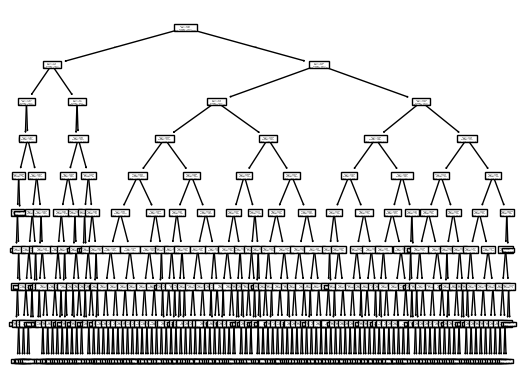

In [15]:
dt_model = tree.DecisionTreeClassifier(max_depth=9,criterion= 'gini',splitter='best')
dt_model.fit(X_train, Y_train)
print(classification_report(Y_test, dt_model.predict(X_test)))
tree.plot_tree(dt_model)

In [16]:
#knn
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
print(classification_report(Y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.84      0.94      0.89     14909
         QSO       0.85      0.81      0.83      4731
        STAR       0.79      0.54      0.64      5360

    accuracy                           0.83     25000
   macro avg       0.83      0.77      0.79     25000
weighted avg       0.83      0.83      0.82     25000



In [17]:
pamarms = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}]

knn_model = GridSearchCV(neighbors.KNeighborsClassifier(),pamarms)
knn_model.fit(X_train,Y_train)

pprint.pprint(knn_model.cv_results_)
print(knn_model.best_params_)

{'mean_fit_time': array([0.41368294, 0.36262431, 0.40234451, 0.41732397, 0.39873118,
       0.40571251, 0.40690184, 0.43619862, 0.41070976, 0.41869645,
       0.40869999, 0.39154005, 0.3891633 , 0.39992685, 0.4250278 ,
       0.36363592, 0.38804917, 0.41449022]),
 'mean_score_time': array([4.25897822, 4.06492286, 3.92565784, 4.60325189, 4.86099787,
       4.8805263 , 4.71860919, 4.6637136 , 5.13226318, 4.73550706,
       4.46126709, 3.91434736, 3.53492527, 4.54422374, 4.43833737,
       4.95472708, 5.04091129, 4.39283805]),
 'mean_test_score': array([0.82681101, 0.82015759, 0.82131763, 0.81695754, 0.81821091,
       0.81241081, 0.81271749, 0.80977078, 0.80841074, 0.80537072,
       0.8045307 , 0.80170401, 0.80061066, 0.79857063, 0.79719726,
       0.79511725, 0.79358389, 0.79102386]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20],
             mask=[False, False, False, False, False, False, False, False,
   

In [18]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)
print(classification_report(Y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.85      0.94      0.89     14909
         QSO       0.88      0.81      0.84      4731
        STAR       0.76      0.59      0.66      5360

    accuracy                           0.84     25000
   macro avg       0.83      0.78      0.80     25000
weighted avg       0.83      0.84      0.83     25000



In [19]:
#random forest
rdf_model = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
rdf_model.fit(X_train, Y_train)
print(classification_report(Y_test, rdf_model.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.86      0.98      0.91     14909
         QSO       0.93      0.52      0.67      4731
        STAR       0.98      0.97      0.97      5360

    accuracy                           0.89     25000
   macro avg       0.92      0.82      0.85     25000
weighted avg       0.90      0.89      0.88     25000



In [20]:
pamarms = [{
    'max_depth':[7,8,9,10,11,12,13,14],
    'criterion':['entropy','gini','log_loss'],
    'random_state':[0],
    'n_estimators':[20,40,60]
}]

rdf_model = GridSearchCV(ensemble.RandomForestClassifier(),pamarms)
rdf_model.fit(X_train,Y_train)

pprint.pprint(rdf_model.cv_results_)
print(rdf_model.best_params_)

{'mean_fit_time': array([ 6.29353161, 12.66607146, 17.02708445,  6.3782548 , 11.51640124,
       15.48621211,  6.177596  , 11.88943028, 17.42918391,  6.21065288,
       14.1997725 , 21.08581586,  8.09706974, 15.14751544, 23.23870573,
        7.59226389, 16.39372201, 23.94672003,  8.17520919, 16.63748822,
       24.74364853,  8.70955439, 16.88281174, 23.57577567,  3.75317154,
        7.59925027, 11.53906822,  4.33857298,  8.64166403, 12.89485869,
        4.89713945,  9.29198642, 13.86456895,  5.0784914 ,  9.5257144 ,
       15.5390605 ,  5.56758299, 10.12583785, 16.68793569,  5.48123069,
       11.81890669, 17.56521449,  6.20575228, 12.32423582, 16.49724889,
        5.74457455, 11.569275  , 17.31628504,  5.28927937,  9.59576406,
       15.5829083 ,  6.26279578, 11.36269722, 17.6591948 ,  6.77226691,
       13.28406897, 18.13941569,  6.37905927, 13.71771321, 20.48420672,
        7.23154683, 14.78524275, 20.90711713,  7.42648678, 14.64805975,
       21.15854335,  7.43497906, 14.11868343, 

In [21]:
rdf_model = ensemble.RandomForestClassifier(max_depth=13, random_state=0,n_estimators = 40,criterion= 'entropy')
rdf_model.fit(X_train, Y_train)
print(classification_report(Y_test, rdf_model.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     14909
         QSO       0.96      0.93      0.95      4731
        STAR       0.99      1.00      1.00      5360

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



In [22]:
#lr
lr_model = linear_model.LogisticRegression(random_state=0,multi_class = 'multinomial',max_iter = 2000,solver = 'saga')
lr_model.fit(X_train, Y_train)
print(classification_report(Y_test, lr_model.predict(X_test)))

d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.96     14909
         QSO       0.94      0.88      0.91      4731
        STAR       0.92      1.00      0.96      5360

    accuracy                           0.95     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.95      0.95      0.95     25000



In [23]:
pamarms = [{'solver':['saga'],
            'max_iter':[3000,4000,5000,6000],
            'multi_class':['multinomial'],
            'random_state':[0],
            'penalty':['l1','l2', 'elasticnet']
}]  

lr_model = GridSearchCV(linear_model.LogisticRegression(),pamarms)
lr_model.fit(X_train,Y_train)

pprint.pprint(lr_model.cv_results_)
print(lr_model.best_params_)

d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_logistic.py:1

{'mean_fit_time': array([1.84205547e+02, 1.45601888e+02, 1.35917664e-02, 2.39244383e+02,
       2.09279196e+02, 6.05764389e-03, 3.01129368e+02, 2.40684980e+02,
       1.26978397e-02, 3.21384390e+02, 2.35556809e+02, 1.30949020e-02]),
 'mean_score_time': array([0.03095322, 0.03064294, 0.        , 0.02907767, 0.0206665 ,
       0.        , 0.02766871, 0.03029199, 0.        , 0.03147159,
       0.03168302, 0.        ]),
 'mean_test_score': array([0.94581258, 0.94554591,        nan, 0.94753261, 0.94711927,
              nan, 0.94778594, 0.94711927,        nan, 0.94778594,
       0.94711927,        nan]),
 'param_max_iter': masked_array(data=[3000, 3000, 3000, 4000, 4000, 4000, 5000, 5000, 5000,
                   6000, 6000, 6000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=999999),
 'param_multi_class': masked_array(data=['multinomial', 'multinomial', 'multinomial',
                   'multino

In [24]:
lr_model = linear_model.LogisticRegression(random_state=0,multi_class = 'multinomial',max_iter = 5000,solver = 'saga',penalty = 'l1')
lr_model.fit(X_train, Y_train)
print(classification_report(Y_test, lr_model.predict(X_test)))

d:\Anaconda\envs\basic\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96     14909
         QSO       0.94      0.88      0.91      4731
        STAR       0.93      1.00      0.96      5360

    accuracy                           0.95     25000
   macro avg       0.94      0.95      0.94     25000
weighted avg       0.95      0.95      0.95     25000



In [25]:
def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

rdf_yn = [py == ty for py,ty in zip(rdf_model.predict(X_test),Y_test)]
lr_yn = [py == ty for py,ty in zip(lr_model.predict(X_test),Y_test)]
dt_yn = [py == ty for py,ty in zip(dt_model.predict(X_test),Y_test)]
knn_yn = [py == ty for py,ty in zip(knn_model.predict(X_test),Y_test)]

In [26]:

if (mcnemar(rdf_yn,lr_yn))[1]<0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')
if (mcnemar(rdf_yn,dt_yn))[1]<0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')
if (mcnemar(rdf_yn,knn_yn))[1]<0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis
Fail to reject null hypothesis
Fail to reject null hypothesis


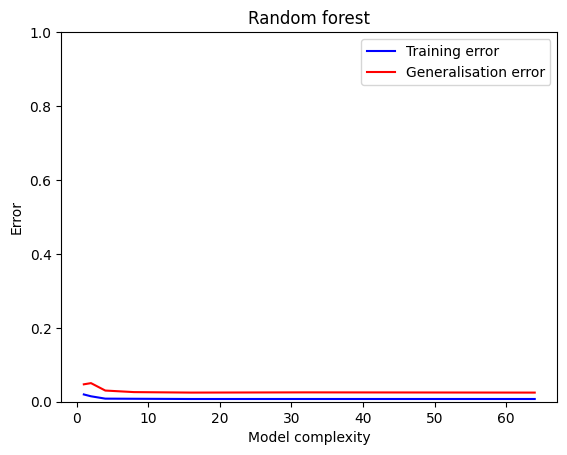

In [27]:
NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10
def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

X_td, X_test, y_td, y_test = train_test_split(data, target, test_size=0.25,random_state=5)
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,random_state=5)
X_train = np.array(X_train)
X_dev = np.array(X_dev)
y_train = np.array(y_train)
y_dev = np.array(y_dev)

complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=13)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()